# Pratique

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stt
from scipy.stats import shapiro
from scipy.stats import probplot

In [2]:
N = 1000
ns = [100, 200, 300]
rho = 1/3
alpha = .05

Dans les plots qui suivent : 

 Quantité 1 - $\sqrt{n} (R_n - \rho)$ 
 
 Quantité 2 - $\sqrt{n} \left(\frac{1}{2}log(\frac{1+R_n}{1-R_n}) - \frac{1}{2}log(\frac{1+\rho}{1-\rho})]\right)$ 

 Les intervalles de confiance sont montrés pour une instance.

In [3]:
def run_n(n, do_plot=True):
    sigma = np.matrix([[1, rho], [rho, 1]])
    samples = np.random.multivariate_normal([0,0], cov=sigma, size=(N, n))

    X = samples[:,:,0]
    Y = samples[:,:,1]

    X_bar = np.mean(X, axis=1).reshape(-1, 1)
    Y_bar = np.mean(Y, axis=1).reshape(-1, 1)

    SnX2 = np.sum((X - X_bar) ** 2, axis=1) / n
    SnY2 = np.sum((Y - Y_bar) ** 2, axis=1) / n

    SnXY2 = np.sum((X - X_bar) * (Y - Y_bar), axis=1) / n

    R = SnXY2 / np.sqrt(SnX2 * SnY2)

    devR = np.sqrt(n) * (R - rho)
    devW = np.sqrt(n) * (np.log((1 + R) / (1 - R)) / 2 - np.log((1 + rho) / (1 - rho)) / 2)

    # Plots de devR
    if do_plot:
      plt.figure()
      ppR = probplot(devR, dist='norm', plot=plt)
      plt.grid()
      plt.title(f"Plot q-q ({n=}) de la Quantite 1")

      plt.figure()
      plt.hist(devR, density=True)
      plt.title(f"Histogramme ({n=}) de la Quantite 1")

      plt.figure()
      plt.boxplot(devR)
      plt.title(f"Boxplot ({n=}) de la Quantite 1")

      # Plots de devW
      plt.figure()
      ppR = probplot(devW, dist='norm', plot=plt)
      plt.grid()
      plt.title(f"Plot q-q ({n=}) de la Quantite 2")

      plt.figure()
      plt.hist(devW, density=True)
      plt.title(f"Histogramme ({n=}) de la Quantite 2")

      plt.figure()
      plt.boxplot(devW)
      plt.title(f"Boxplot ({n=}) de la Quantite 2");

    # Test Shapiro-Wilks
    _, pR = shapiro(devR)
    _, pW = shapiro(devW)

    if do_plot:
      print(f"Pour {n=}:")
      print(f"  Quantité 1 - p-valeur={pR:.2e}")
      print(f"  Quantité 2 - p-valeur={pW:.2e}")

    # Intervalles de confiance
    z = stt.norm.ppf(1 - alpha / 2)

    R0 = R[0]
    IR = [R0 - z * (1 - R0 ** 2) / np.sqrt(n), R0 + z * (1 - R0 ** 2) / np.sqrt(n)]
    
    W0 = np.log((1 + R0) / (1 - R0)) / 2
    IW = [(np.exp(2 * (W0 - z / np.sqrt(n))) - 1) / (np.exp(2 * (W0 - z / np.sqrt(n))) + 1), 
          (np.exp(2 * (W0 + z / np.sqrt(n))) - 1) / (np.exp(2 * (W0 + z / np.sqrt(n))) + 1)]
    
    if do_plot:
      print(f"  Intervalle (1) : {IR}")
      print(f"  Intervalle (2) : {IW}")
    
    return pR, pW


Pour n=100:
  Quantité 1 - p-valeur=1.42e-03
  Quantité 2 - p-valeur=5.23e-01
  Intervalle (1) : [0.025026123750093526, 0.39936839560671455]
  Intervalle (2) : [0.019472229864091573, 0.38971799762722314]


(0.0014160366263240576, 0.5233244895935059)

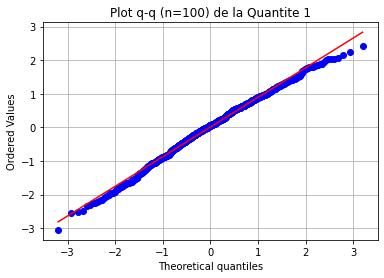

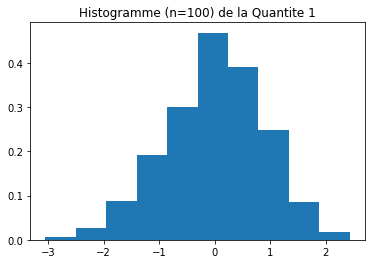

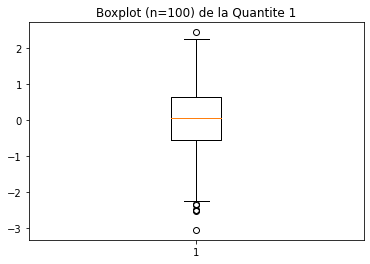

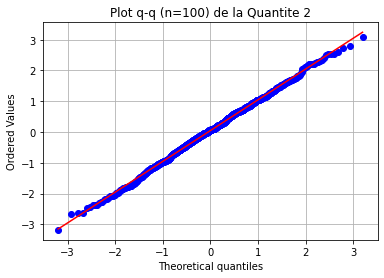

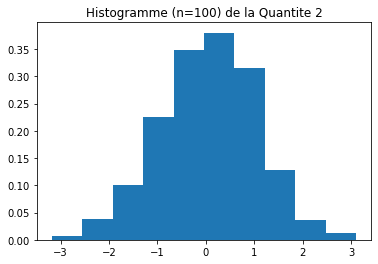

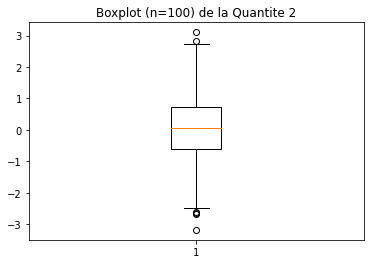

In [4]:
# n = 100
run_n(n=100)

Pour n=200:
  Quantité 1 - p-valeur=2.87e-02
  Quantité 2 - p-valeur=4.93e-01
  Intervalle (1) : [0.20160373403971046, 0.44941540113123335]
  Intervalle (2) : [0.1966130882713951, 0.4433460287433841]


(0.028659336268901825, 0.49285581707954407)

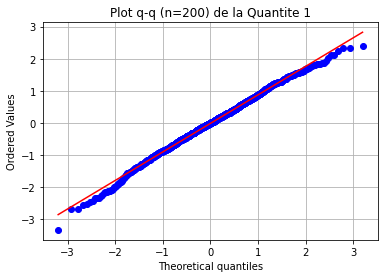

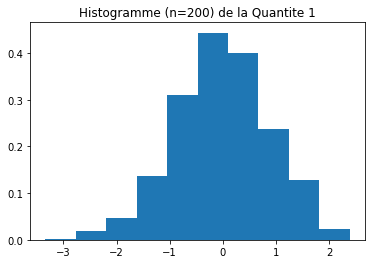

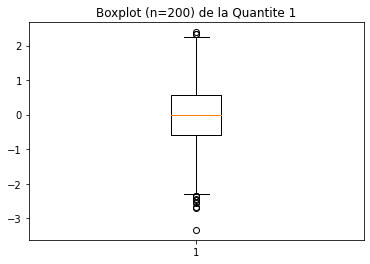

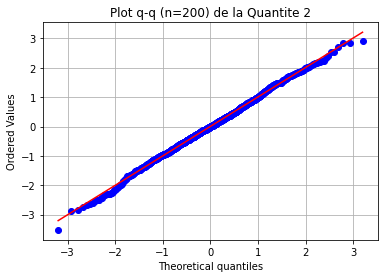

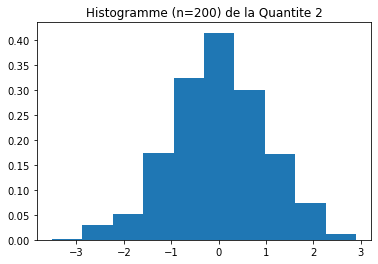

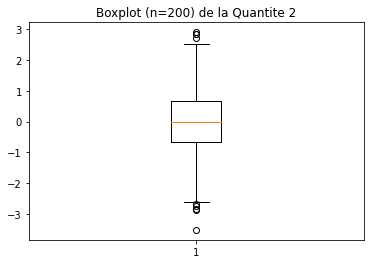

In [5]:
# n = 200
run_n(n=200)

Pour n=300:
  Quantité 1 - p-valeur=6.18e-02
  Quantité 2 - p-valeur=1.78e-01
  Intervalle (1) : [0.35553421489559534, 0.5367995631296639]
  Intervalle (2) : [0.351141877563713, 0.5320948152280667]


(0.061803679913282394, 0.17752140760421753)

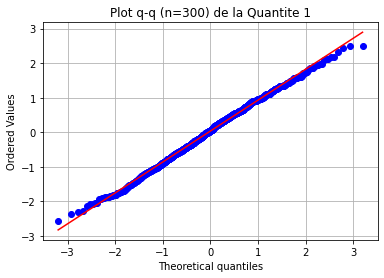

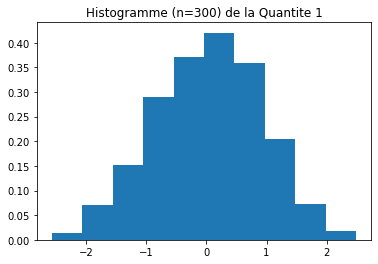

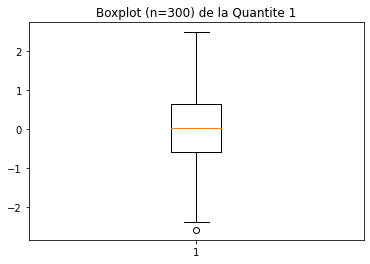

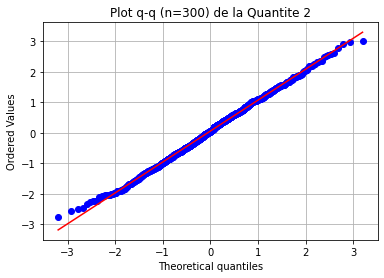

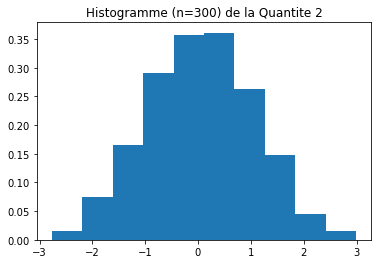

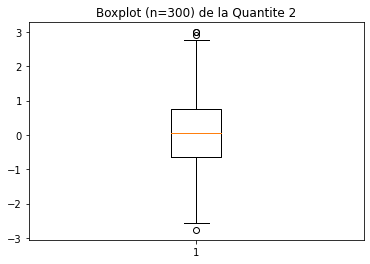

In [6]:
# n = 300
run_n(n=300)

In [7]:
n = 300
N_ps = 1000

pR = np.zeros(N_ps)
pW = np.zeros(N_ps)
for i in range(N_ps):
    pR[i], pW[i] = run_n(n, do_plot=False)

Text(0.5, 1.0, 'p-valeur - Quantite 2')

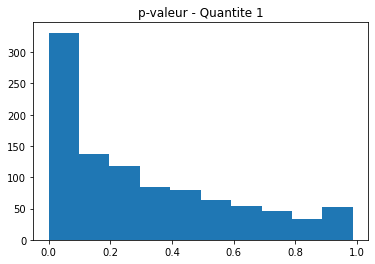

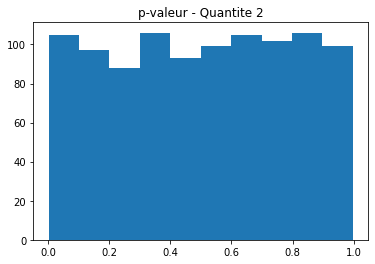

In [8]:

plt.figure()
plt.hist(pR, bins=10)
plt.title("p-valeur - Quantite 1")

plt.figure()
plt.hist(pW, bins=10)
plt.title("p-valeur - Quantite 2")

## Conclusions
La forme du graphe des p-valeurs des tests de Shapiro-Wilks pour la quantité 1 nous montre que l'hypothèse nulle peut être rejetée car plusieurs tests obtiennent des p-valeurs petites. En revanche les tests pour la quantité 2 ne nous permettent pas de rejeter l’hypothèse nulle car les p-valeurs sont distribués presque uniformément entre zéro et un. La même approche est utilisée dans le polycopié (Figure I-3.4). Alors, construire un intervalle de confiance en utilisant la quantité 1 entraîne une approximation plus grossière qu’entrainerait la construction à partir de la quantité 2.

Notons aussi que l’intervalle donné par la deuxième formule est proche de l’intervalle de la première formule et l’approche de plus en plus quand $n$ augmente. Ce comportement est attendu car la deuxième formule est asymptotiquement égale à la première.
